# Titanic Survival Classification

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("2주차/titanic_processed.csv")
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,1,22.000000,1,0,7.2500,146
1,2,1,1,0,38.000000,1,0,71.2833,81
2,3,1,3,0,26.000000,0,0,7.9250,146
3,4,1,1,0,35.000000,1,0,53.1000,55
4,5,0,3,1,35.000000,0,0,8.0500,146
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,146
887,888,1,1,0,19.000000,0,0,30.0000,30
888,889,0,3,0,29.699118,1,2,23.4500,146
889,890,1,1,1,26.000000,0,0,30.0000,60


## 데이터 확인

In [3]:
# 데이터 확인
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,1,22.000000,1,0,7.2500,146
1,2,1,1,0,38.000000,1,0,71.2833,81
2,3,1,3,0,26.000000,0,0,7.9250,146
3,4,1,1,0,35.000000,1,0,53.1000,55
4,5,0,3,1,35.000000,0,0,8.0500,146
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,146
887,888,1,1,0,19.000000,0,0,30.0000,30
888,889,0,3,0,29.699118,1,2,23.4500,146
889,890,1,1,1,26.000000,0,0,30.0000,60


In [4]:
# 컬렴명 확인
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin'],
      dtype='object')

Text(0.5, 1.0, 'Survival Distribution')

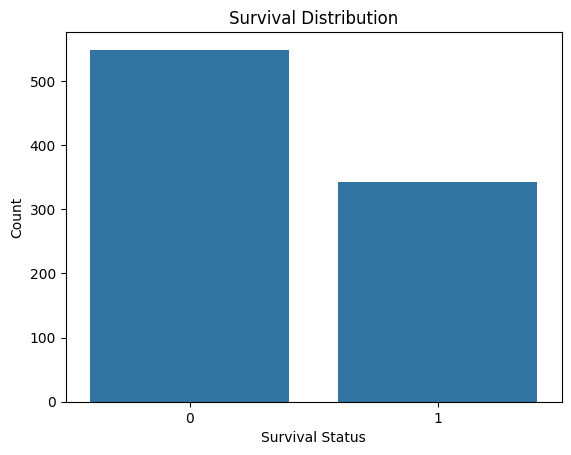

In [5]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Survived")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.title("Survival Distribution")

In [6]:
# 레이블 갯수 확인 (숫자)
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
# 결측치 확인
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
dtype: int64

In [8]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
dtype: int64

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5508\834985196.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde = True, hist = False, ax=ax1)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5508\834985196.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

<Axes: xlabel='Fare', ylabel='Density'>

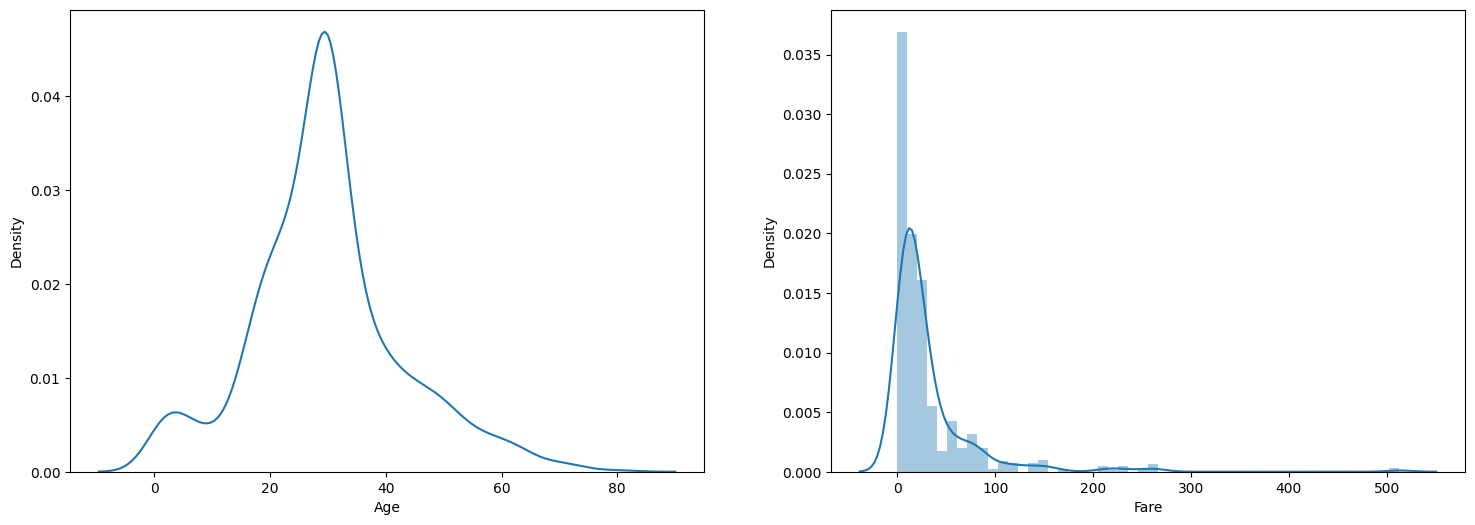

In [9]:
# 컬럼별 히스토그램 확인
# 'Age'와 'Fare' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Age'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Fare'], ax=ax2)

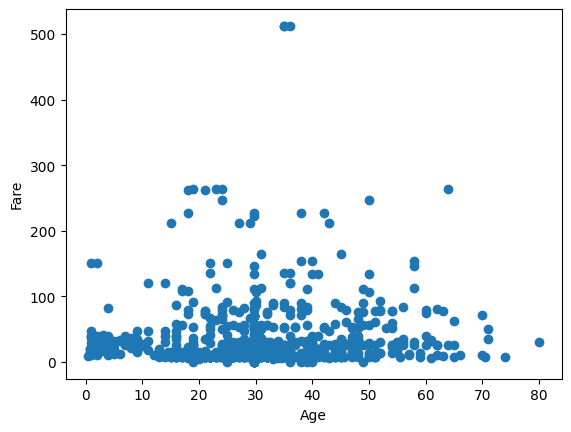

In [10]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

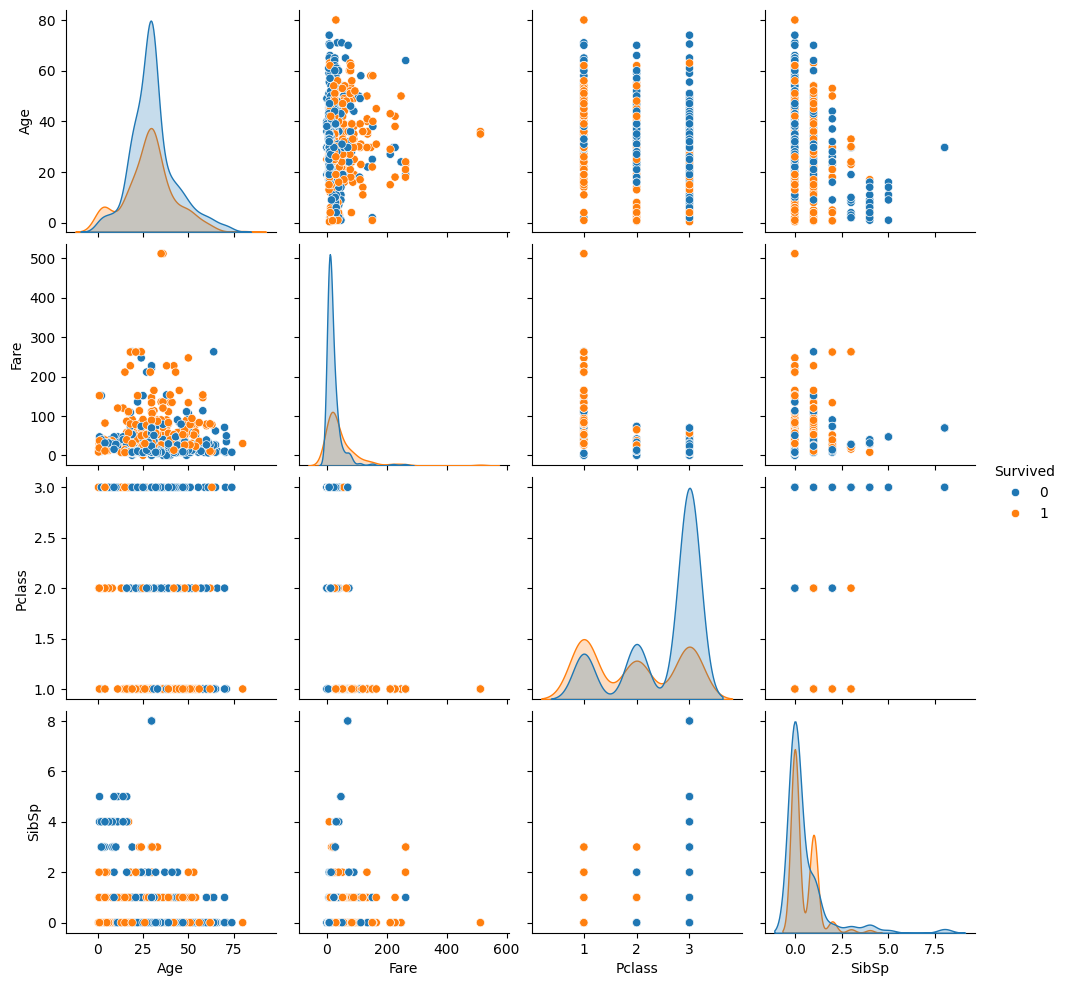

In [11]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Age', 'Fare', 'Pclass', 'SibSp'],
            hue ='Survived')
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5508\549519335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age", data=df, palette="Set3")


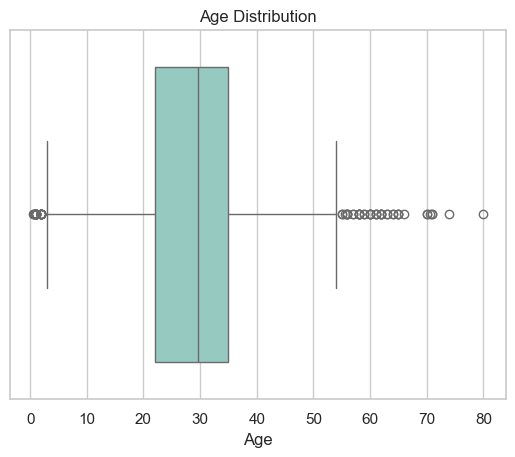

In [12]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Age", data=df, palette="Set3")
plt.title("Age Distribution")
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5508\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


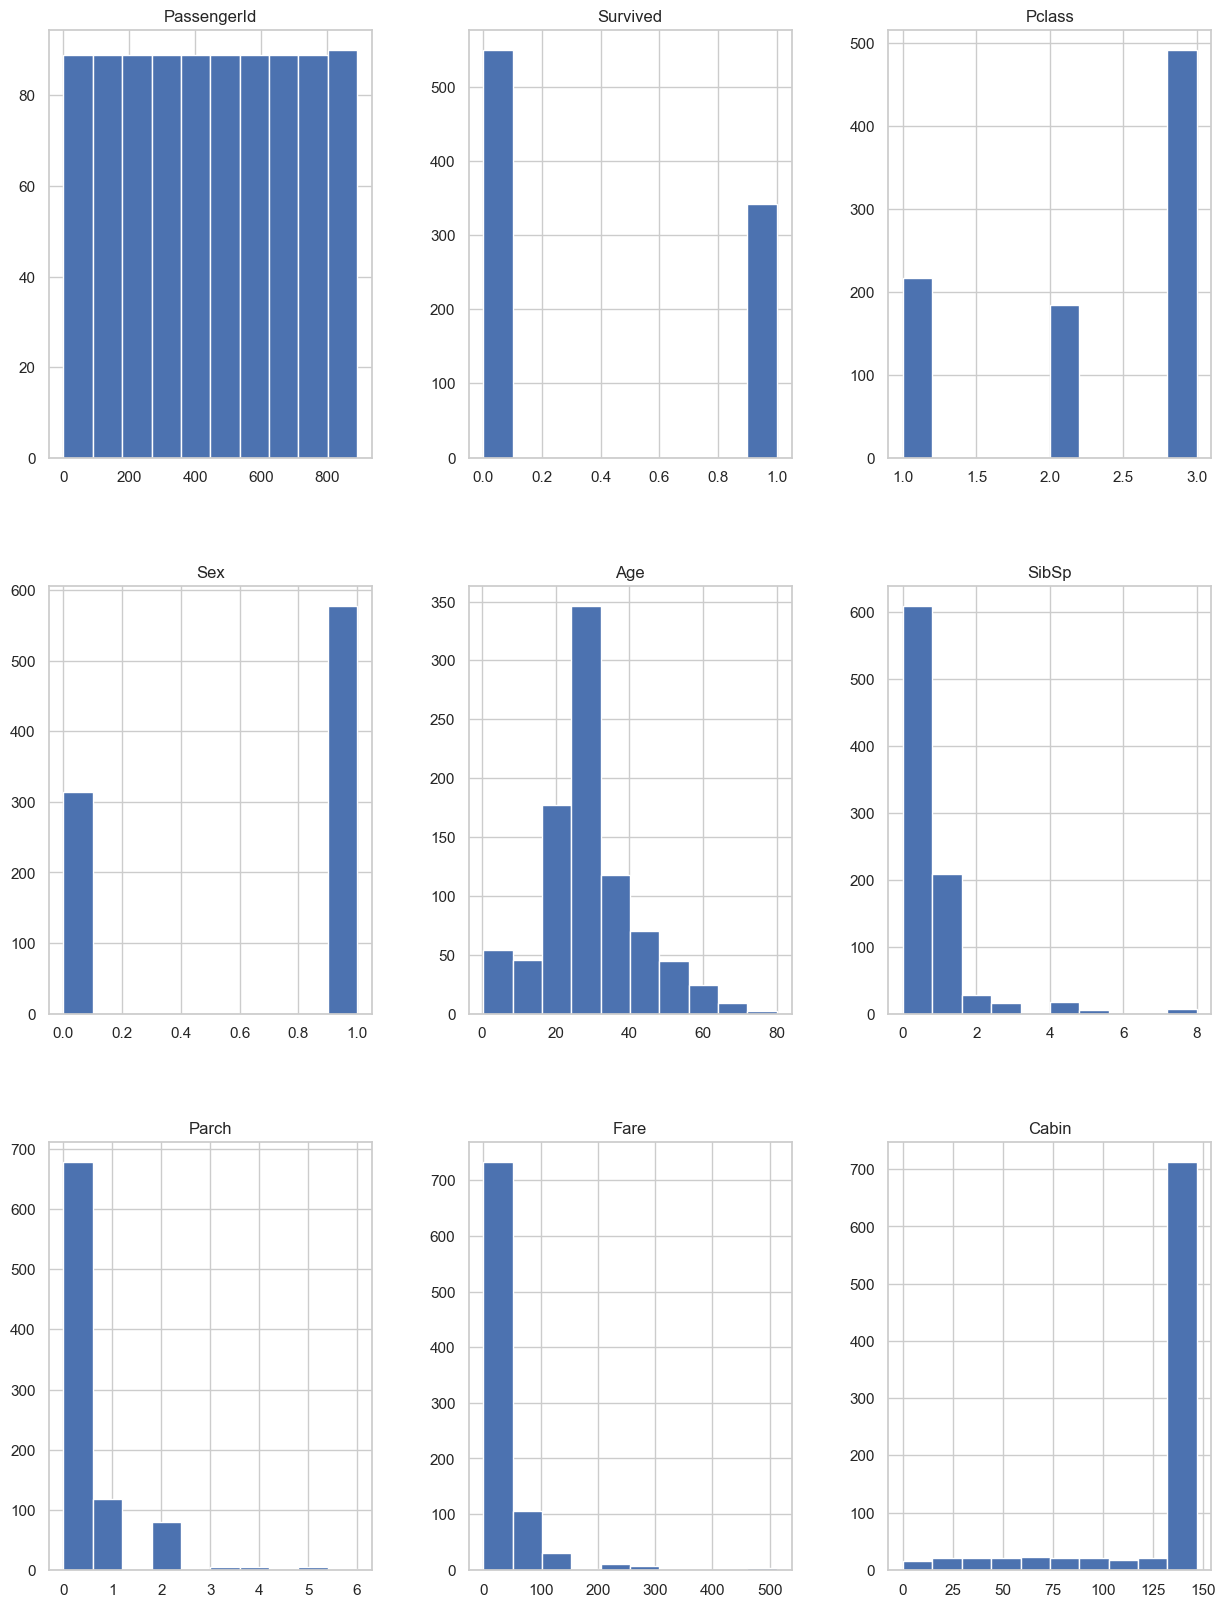

In [13]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

## 데이터 전처리 및 모델링

In [14]:
X = df.drop('Survived', axis=1)
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,3,1,22.0,1,0,7.2500,146
1,2,1,0,38.0,1,0,71.2833,81
2,3,3,0,26.0,0,0,7.9250,146
3,4,1,0,35.0,1,0,53.1000,55
4,5,3,1,35.0,0,0,8.0500,146


In [15]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,1,22.000000,1,0,7.2500,146
1,2,1,1,0,38.000000,1,0,71.2833,81
2,3,1,3,0,26.000000,0,0,7.9250,146
3,4,1,1,0,35.000000,1,0,53.1000,55
4,5,0,3,1,35.000000,0,0,8.0500,146
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,146
887,888,1,1,0,19.000000,0,0,30.0000,30
888,889,0,3,0,29.699118,1,2,23.4500,146
889,890,1,1,1,26.000000,0,0,30.0000,60


In [16]:
y = df['Survived']
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [20]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7040358744394619
[[134   5]
 [ 61  23]]


In [21]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7892376681614349
[[118  21]
 [ 26  58]]


c:\Users\wlsgh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.6860986547085202
[[93 46]
 [24 60]]


In [23]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7443946188340808
[[111  28]
 [ 29  55]]


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.8295964125560538
[[123  16]
 [ 22  62]]


## Neural Network with TensorFlow/Keras

In [25]:
# Normalize the data for neural network
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Build Keras model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
# Train model with early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train_scaled, y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
21/21 [==============================] - 3s 32ms/step - loss: 0.6537 - accuracy: 0.6572 - val_loss: 0.5911 - val_accuracy: 0.7444
Epoch 2/100
21/21 [==============================] - 0s 9ms/step - loss: 0.5835 - accuracy: 0.7096 - val_loss: 0.5292 - val_accuracy: 0.7758
Epoch 3/100
21/21 [==============================] - 0s 9ms/step - loss: 0.5338 - accuracy: 0.7605 - val_loss: 0.4828 - val_accuracy: 0.8027
Epoch 4/100
21/21 [==============================] - 0s 9ms/step - loss: 0.4928 - accuracy: 0.7874 - val_loss: 0.4599 - val_accuracy: 0.7713
Epoch 5/100
21/21 [==============================] - 0s 9ms/step - loss: 0.4809 - accuracy: 0.7889 - val_loss: 0.4397 - val_accuracy: 0.7758
Epoch 6/100
21/21 [==============================] - 0s 8ms/step - loss: 0.4566 - accuracy: 0.8084 - val_loss: 0.4320 - val_accuracy: 0.7668
Epoch 7/100
21/21 [==============================] - 0s 9ms/step - loss: 0.4494 - accuracy: 0.7949 - val_loss: 0.4264 - val_accuracy: 0.7713
Epoch 8/100


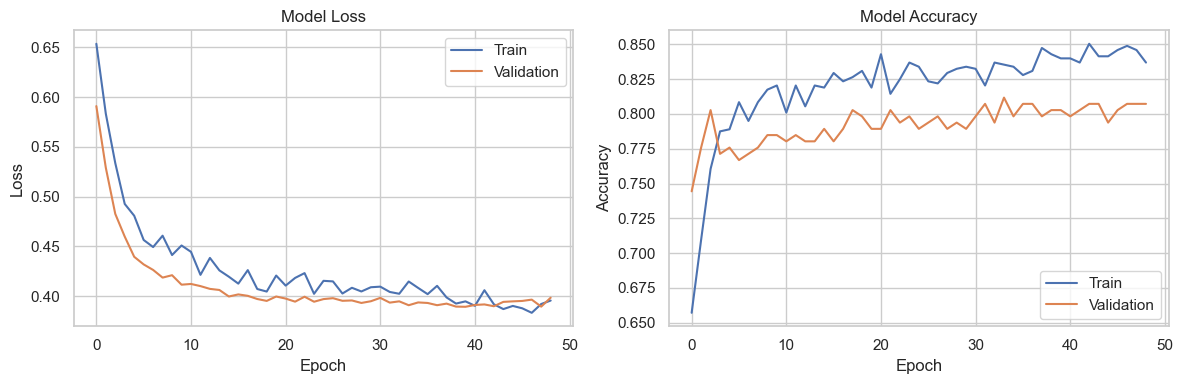

In [29]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [30]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

7/7 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8027
Test Accuracy: 0.8027


In [31]:
# Make predictions with the neural network
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

7/7 [==============================] - 0s 16ms/step
Confusion Matrix:
[[119  20]
 [ 24  60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       139
           1       0.75      0.71      0.73        84

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [32]:
# KNN Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'n_neighbors': np.arange(1, 30, 2),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Create KNN classifier
knn = KNeighborsClassifier()

# Use GridSearch to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}
Best cross-validation score: 0.8128829536527886


In [33]:
# Use the best model
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

print("\n--- KNN with Best Parameters ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


--- KNN with Best Parameters ---
Accuracy: 0.820627802690583
Confusion Matrix:
[[121  18]
 [ 22  62]]
